In [1]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt

 
theta = np.arange(-90, 90, 1) /180*np.pi  #coordinate theta (assume no backlobe)
phi = np.arange(0, 361, 1) /180*np.pi     #coordinate phi




frquency = 10*10**9
wavelength = 3*10**8/frquency
d = wavelength / 2


bf_theta = 0 /180*np.pi     # beamforing direction in theta
bf_phi = 0 /180*np.pi       # beamforing direction in phi

Num_x = 8  # element number in x axes
Num_y = 8   # element number in y axes

In [2]:
Ele_x = np.arange(0, Num_x, 1) * d   # element position in x axes
Ele_y = np.arange(0, Num_y, 1) * d   # element position in y axes

Ele_x = np.reshape(np.repeat(Ele_x, Num_y),(Num_x ,Num_y), order = 'C')  # all element position for x axes
Ele_y = np.reshape(np.repeat(Ele_y, Num_x),(Num_x ,Num_y), order = 'F')  # all element position for y axes
Ele_z = np.zeros((Num_x,Num_y))                                          # all element position for z axes

In [3]:
# Position = np.array([Ele_x,Ele_y,Ele_z])

In [4]:
Theta = np.reshape(np.repeat(theta, len(phi)),(len(phi) ,len(theta)), order = 'F') # all grid for theta
Phi = np.reshape(np.repeat(phi, len(theta)),(len(phi) ,len(theta)), order = 'C')   # all grid for phi

In [5]:
kx = 2*np.pi* np.sin(Theta) * np.cos(Phi) /wavelength         # kx for indcident direction
ky = 2*np.pi* np.sin(Theta) * np.sin(Phi) /wavelength         # ky for indcident direction
kz = 2*np.pi* np.cos(Theta) /wavelength                       # kz for indcident direction

bf_kx = 2*np.pi* np.sin(bf_theta) * np.cos(bf_phi) /wavelength   # kx for beamforming direction
bf_ky = 2*np.pi* np.sin(bf_theta) * np.sin(bf_phi) /wavelength   # ky for beamforming direction
bf_kz = 2*np.pi* np.cos(bf_theta) /wavelength                    # kz for beamforming direction

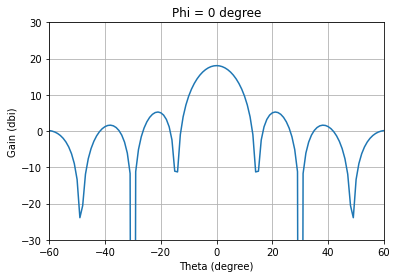

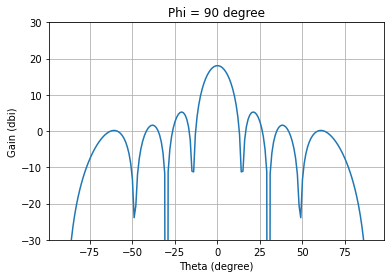

In [7]:
## Array Factor Calculator
AF = np.zeros_like(Theta) + np.ones_like(Theta)*0*1j
for i in range(0, len(theta), 1):
    for j in range(0, len(phi),1):
        ele = np.exp(-1j*(kx[j,i]*Ele_x + ky[j,i]*Ele_y + kz[j,i]*Ele_z)) \
        *np.exp(1j*(bf_kx*Ele_x + bf_ky*Ele_y + bf_kz*Ele_z))
        
            
   
        AF[j,i] = ele.sum()
    
AF = 20*np.log10(abs(AF)*1/(Num_x*Num_y)**0.5)




## plot 2D in phi = 0 and phi = 90

plt.plot(theta/np.pi*180, AF[0,:])
plt.grid()
plt.xlabel('Theta (degree)')
plt.ylabel('Gain (dbi)')
plt.title('Phi = 0 degree')
plt.ylim(-30,30)
plt.xlim(-60,60)
plt.show()
RHCP
plt.plot(theta/np.pi*180, AF[round(0.25*len(phi)),:])
plt.grid()
plt.xlabel('Theta (degree)')
plt.ylabel('Gain (dbi)')
plt.title('Phi = 90 degree')
plt.ylim(-30,30)
plt.show()


In [7]:

# plt.imshow(AF, cmap = 'jet', vmin =-30, vmax = 30)
# plt.gca()
# plt.show()


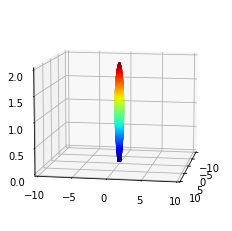

In [10]:
## plot 3D xyz coordinate

import mpl_toolkits.mplot3d.axes3d as axes3d


R = 10**(AF/20)
X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z,   rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    alpha=1)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.view_init(elev=10, azim=10)